In [1]:
!pip install kaggle

In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#API to fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:05<00:00, 32.7MB/s]
100% 163M/163M [00:05<00:00, 29.3MB/s]


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing Libraries**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3275.jpg', 'with_mask_1375.jpg', 'with_mask_1193.jpg', 'with_mask_3420.jpg', 'with_mask_2914.jpg']
['with_mask_2538.jpg', 'with_mask_3093.jpg', 'with_mask_1689.jpg', 'with_mask_2524.jpg', 'with_mask_2041.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1158.jpg', 'without_mask_443.jpg', 'without_mask_2041.jpg', 'without_mask_2064.jpg', 'without_mask_3453.jpg']
['without_mask_2434.jpg', 'without_mask_822.jpg', 'without_mask_287.jpg', 'without_mask_3084.jpg', 'without_mask_3304.jpg']


Number of Images in the dataset to confirm that the data class is balanced

In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Label creation for the classes of images in the dataset**

assigning with mask images - 1
assigning without mask images - 0 **bold text**

In [12]:
#Label creation

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Image Preprocessing**

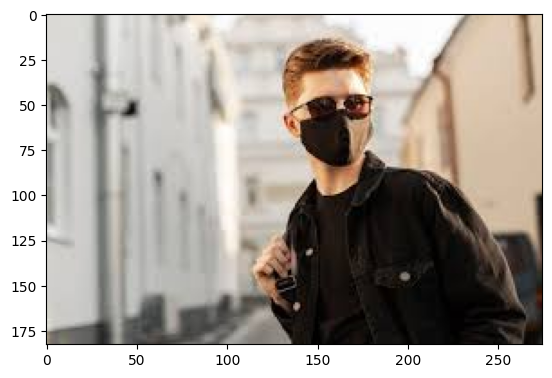

In [17]:
#Image display (with mask)
img = mpimg.imread('/content/data/with_mask/with_mask_2455.jpg')
imgplot = plt.imshow(img)
plt.show()

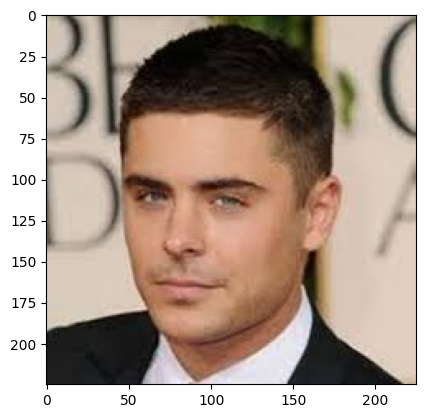

In [18]:
#Image display (without mask)
img = mpimg.imread('/content/data/without_mask/without_mask_2755.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Resizing and conversion to numpy arrays**

In [19]:
#array conversion

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
len(data)

7553

In [21]:
data[1].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [24]:
print(Y)

[1 1 1 ... 0 0 0]


**Train/Test Ratio**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (5287, 128, 128, 3) (2266, 128, 128, 3)


In [27]:
# scaling of the dataset

X_train_scaled = X_train/255

X_test_scaled = X_test/255

**Before and after scaling is performed**

In [28]:
X_train[0]

array([[[192, 194, 191],
        [193, 195, 192],
        [193, 194, 191],
        ...,
        [225, 226, 231],
        [224, 225, 230],
        [224, 225, 230]],

       [[191, 193, 188],
        [192, 193, 188],
        [192, 193, 188],
        ...,
        [222, 222, 225],
        [222, 222, 225],
        [223, 223, 227]],

       [[192, 194, 185],
        [192, 193, 184],
        [192, 194, 185],
        ...,
        [213, 213, 211],
        [214, 214, 212],
        [214, 214, 213]],

       ...,

       [[ 45,  66,  57],
        [ 45,  66,  57],
        [ 46,  66,  57],
        ...,
        [ 66,  87,  90],
        [ 67,  88,  91],
        [ 68,  89,  91]],

       [[ 47,  67,  58],
        [ 47,  67,  58],
        [ 47,  67,  58],
        ...,
        [ 67,  88,  91],
        [ 67,  88,  91],
        [ 68,  89,  91]],

       [[ 48,  68,  59],
        [ 48,  68,  59],
        [ 48,  68,  59],
        ...,
        [ 66,  87,  90],
        [ 66,  87,  90],
        [ 66,  87,  89]]

In [29]:
X_train_scaled[0]

array([[[0.75294118, 0.76078431, 0.74901961],
        [0.75686275, 0.76470588, 0.75294118],
        [0.75686275, 0.76078431, 0.74901961],
        ...,
        [0.88235294, 0.88627451, 0.90588235],
        [0.87843137, 0.88235294, 0.90196078],
        [0.87843137, 0.88235294, 0.90196078]],

       [[0.74901961, 0.75686275, 0.7372549 ],
        [0.75294118, 0.75686275, 0.7372549 ],
        [0.75294118, 0.75686275, 0.7372549 ],
        ...,
        [0.87058824, 0.87058824, 0.88235294],
        [0.87058824, 0.87058824, 0.88235294],
        [0.8745098 , 0.8745098 , 0.89019608]],

       [[0.75294118, 0.76078431, 0.7254902 ],
        [0.75294118, 0.75686275, 0.72156863],
        [0.75294118, 0.76078431, 0.7254902 ],
        ...,
        [0.83529412, 0.83529412, 0.82745098],
        [0.83921569, 0.83921569, 0.83137255],
        [0.83921569, 0.83921569, 0.83529412]],

       ...,

       [[0.17647059, 0.25882353, 0.22352941],
        [0.17647059, 0.25882353, 0.22352941],
        [0.18039216, 0

**Convolutional Neural Network Development**

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

fcdmodel = keras.Sequential()

fcdmodel.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
fcdmodel.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


fcdmodel.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
fcdmodel.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

fcdmodel.add(keras.layers.Flatten())

fcdmodel.add(keras.layers.Dense(128, activation='relu'))
fcdmodel.add(keras.layers.Dropout(0.5))

fcdmodel.add(keras.layers.Dense(64, activation='relu'))
fcdmodel.add(keras.layers.Dropout(0.5))


fcdmodel.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [32]:
#CNN Model compiling
fcdmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [33]:
#training the convolutional neural network
history = fcdmodel.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
149/149 [==============================] - 10s 25ms/step - loss: 0.4903 - acc: 0.7835 - val_loss: 0.3079 - val_acc: 0.8847
Epoch 2/10
149/149 [==============================] - 3s 18ms/step - loss: 0.3241 - acc: 0.8705 - val_loss: 0.2739 - val_acc: 0.8960
Epoch 3/10
149/149 [==============================] - 3s 20ms/step - loss: 0.2730 - acc: 0.8882 - val_loss: 0.2219 - val_acc: 0.9112
Epoch 4/10
149/149 [==============================] - 3s 20ms/step - loss: 0.2308 - acc: 0.9092 - val_loss: 0.2100 - val_acc: 0.9206
Epoch 5/10
149/149 [==============================] - 3s 18ms/step - loss: 0.2145 - acc: 0.9170 - val_loss: 0.1977 - val_acc: 0.9225
Epoch 6/10
149/149 [==============================] - 3s 18ms/step - loss: 0.1793 - acc: 0.9288 - val_loss: 0.2155 - val_acc: 0.9357
Epoch 7/10
149/149 [==============================] - 3s 18ms/step - loss: 0.1567 - acc: 0.9359 - val_loss: 0.1999 - val_acc: 0.9301
Epoch 8/10
149/149 [==============================] - 3s 20ms/step -

**Model Evaluation**

In [34]:
#Model evaluation
loss, accuracy = fcdmodel.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

71/71 [==============================] - 1s 10ms/step - loss: 0.2411 - acc: 0.9272
Test Accuracy = 0.9271844625473022


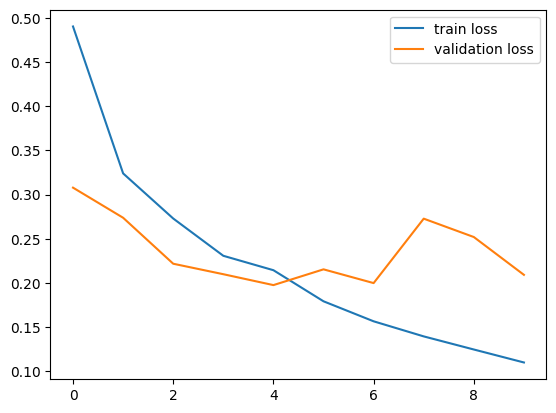

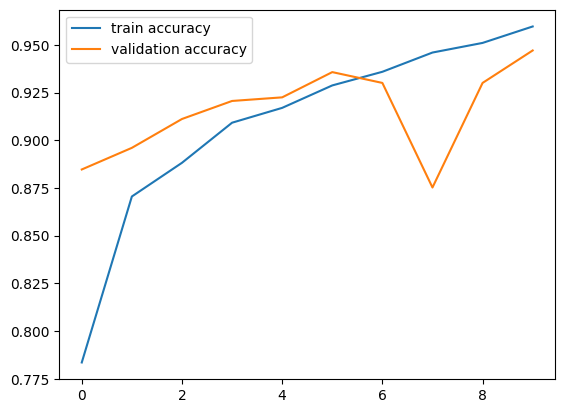

In [35]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System on Images**

Path of the image to be predicted: /content/test.jpg


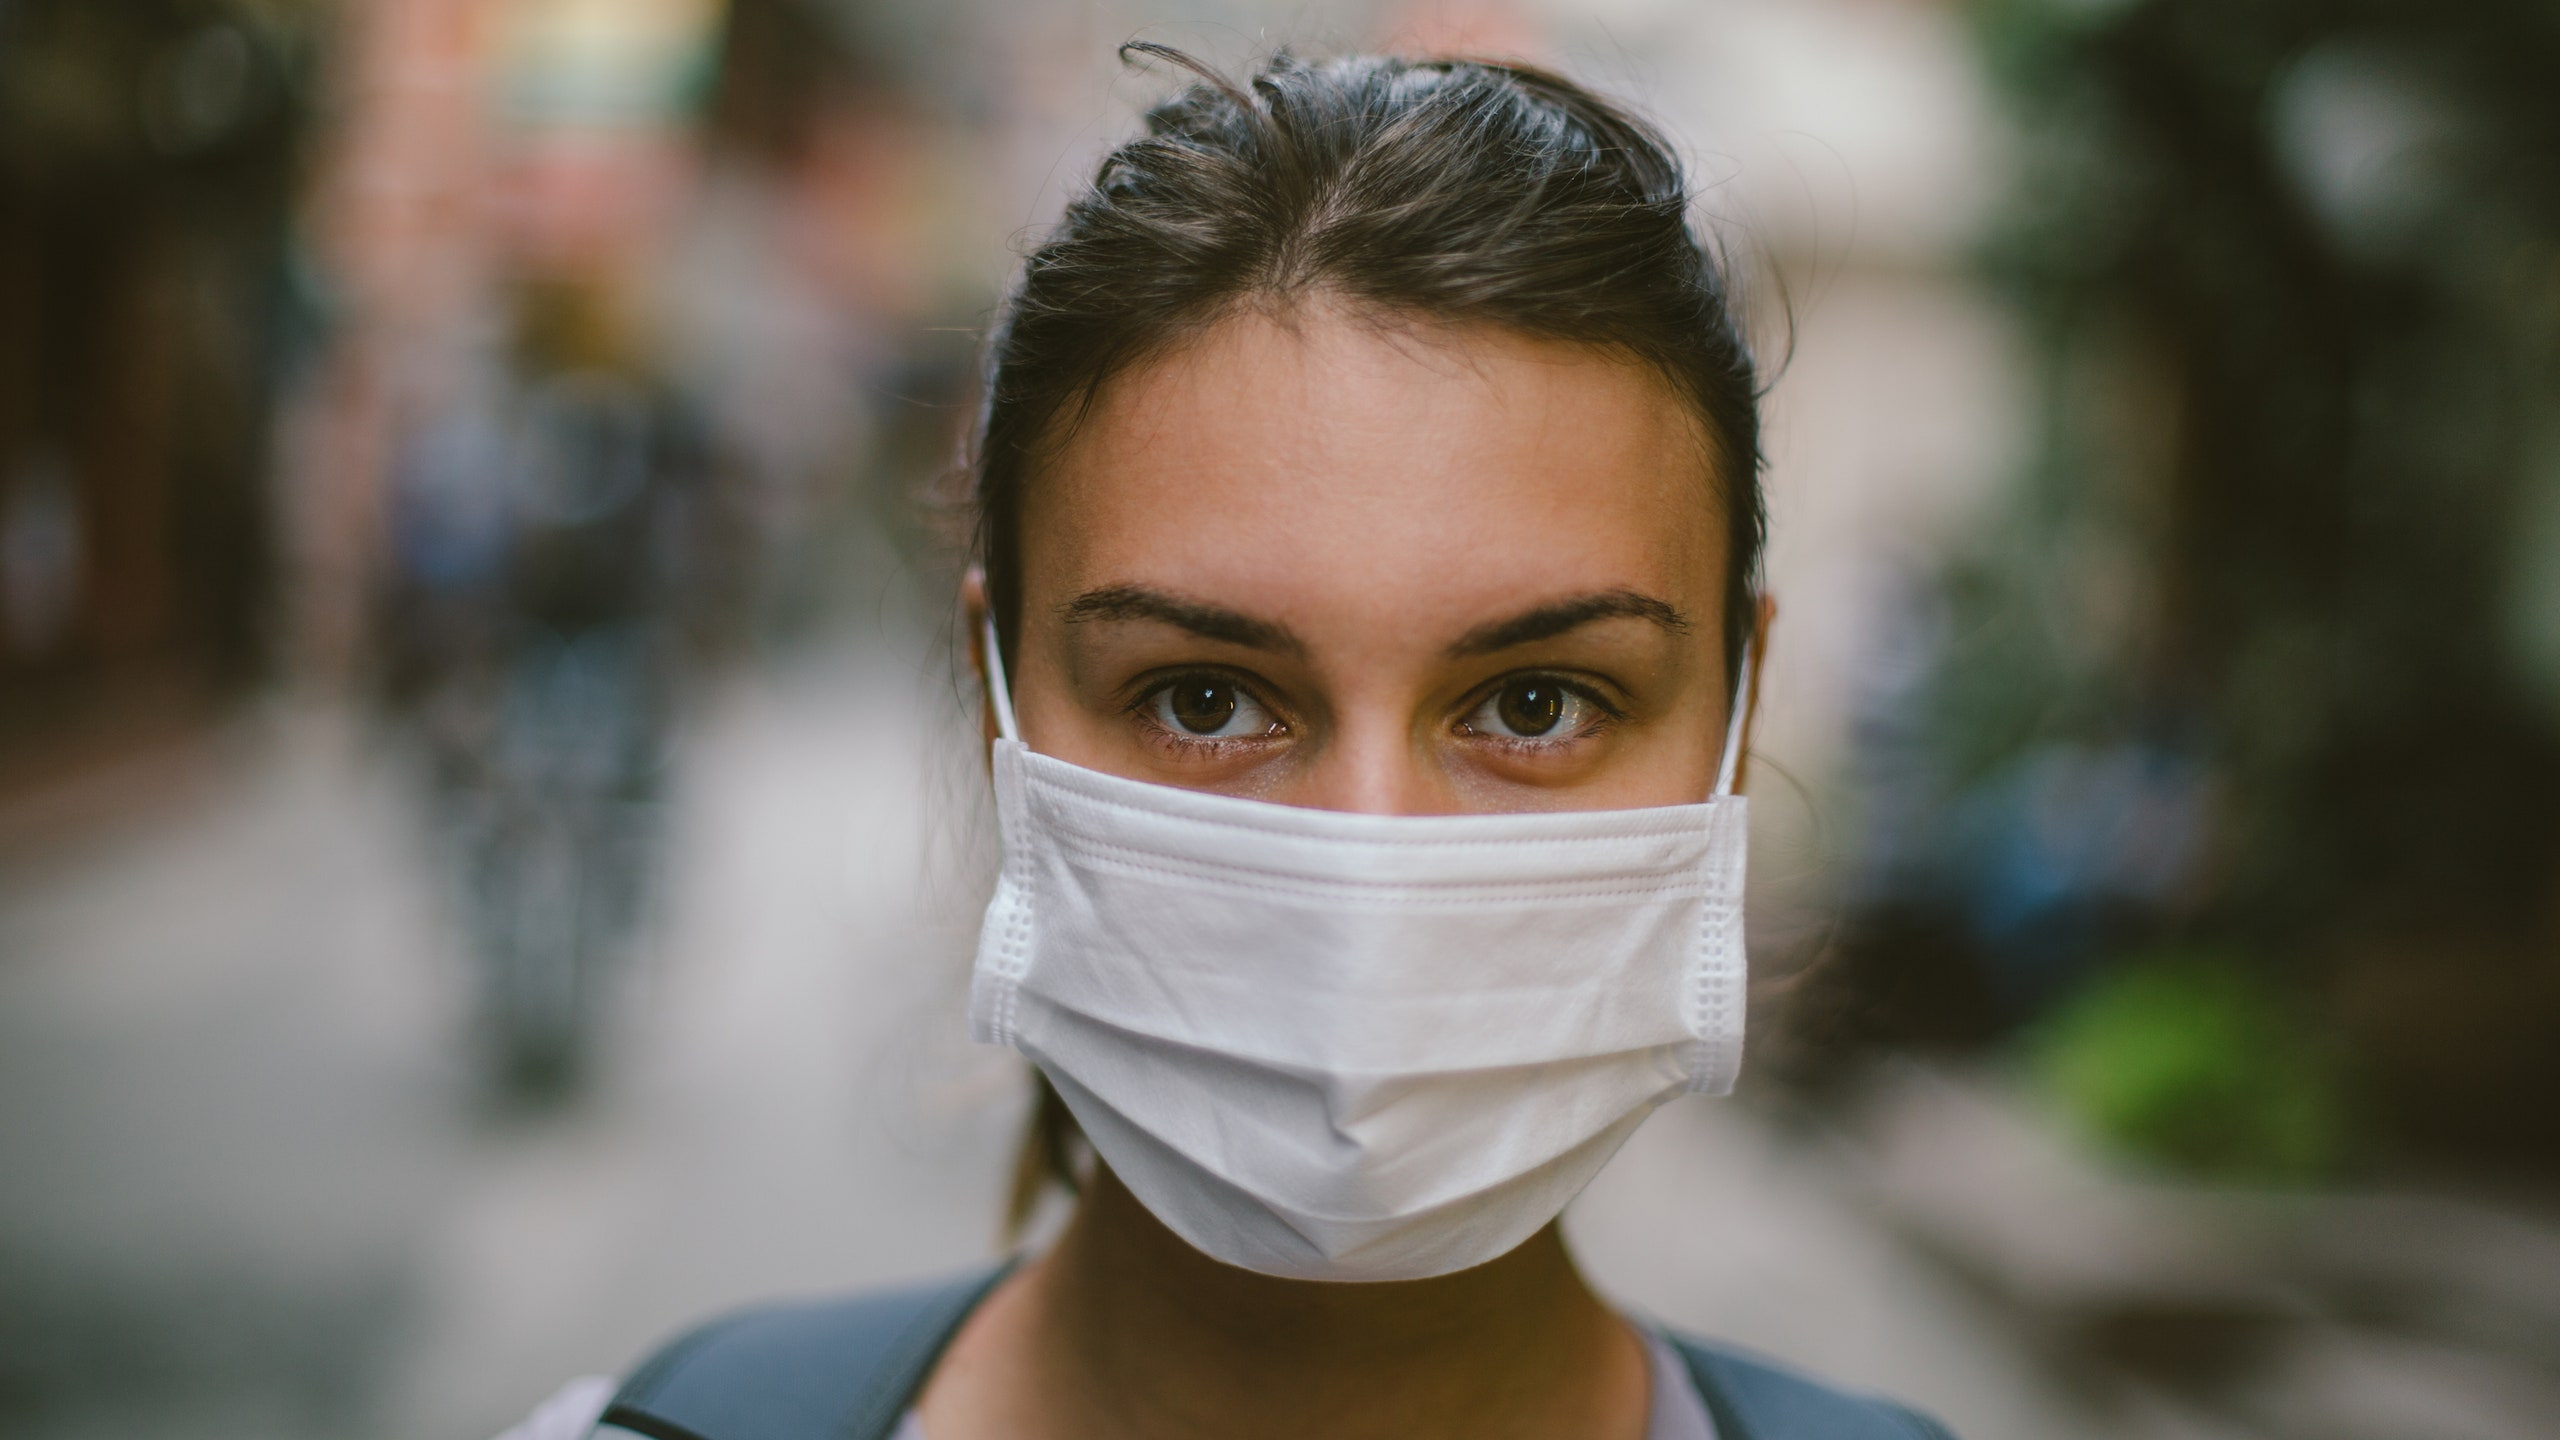

1/1 [==============================] - 0s 430ms/step
[[0.30810952 0.6431579 ]]
1
The person in the image is wearing a mask


In [36]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = fcdmodel.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/testw2.jpg


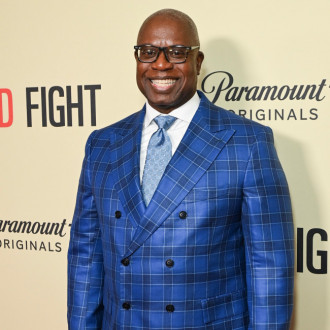

1/1 [==============================] - 0s 19ms/step
[[0.9919476  0.05963572]]
0
The person in the image is not wearing a mask


In [37]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = fcdmodel.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')